In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(0)
m = 100
X = 2 * np.random.rand(m, 3)
y = 4 + 3 * X[:,0] + 5 * X[:,1] + 2 * X[:,2] + np.random.randn(m)

X_b = np.c_[np.ones((m, 1)), X]

In [10]:
X.shape, y.shape, X_b.shape

((100, 3), (100,), (100, 4))

In [3]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Estimated parameters:", theta_best)

Estimated parameters: [3.9502139  2.79566239 4.98997832 2.12661549]


In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Intercept: 3.950213902468356
Coefficients: [2.79566239 4.98997832 2.12661549]


In [5]:
y_pred_manual = X_b.dot(theta_best)
y_pred_sklearn = lin_reg.predict(X)

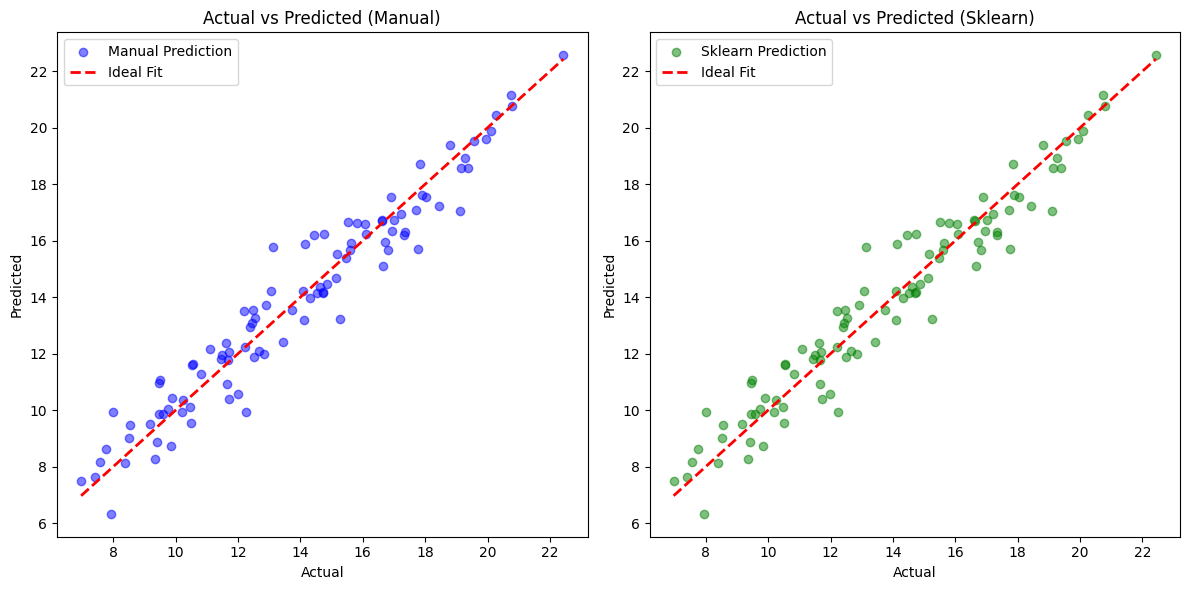

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_manual, color='blue', alpha=0.5, label='Manual Prediction')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2, label='Ideal Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Manual)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_sklearn, color='green', alpha=0.5, label='Sklearn Prediction')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2, label='Ideal Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Sklearn)')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
residuals_manual = y - y_pred_manual
residuals_sklearn = y - y_pred_sklearn

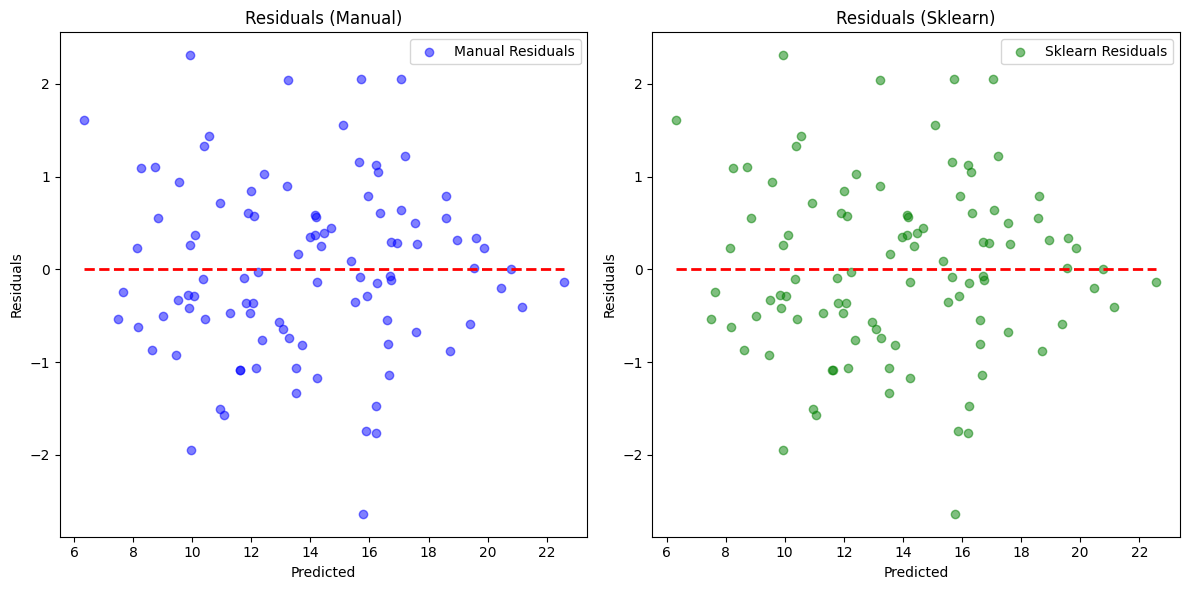

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_manual, residuals_manual, color='blue', alpha=0.5, label='Manual Residuals')
plt.hlines(y=0, xmin=y_pred_manual.min(), xmax=y_pred_manual.max(), color='red', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals (Manual)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_pred_sklearn, residuals_sklearn, color='green', alpha=0.5, label='Sklearn Residuals')
plt.hlines(y=0, xmin=y_pred_sklearn.min(), xmax=y_pred_sklearn.max(), color='red', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals (Sklearn)')
plt.legend()

plt.tight_layout()
plt.show()

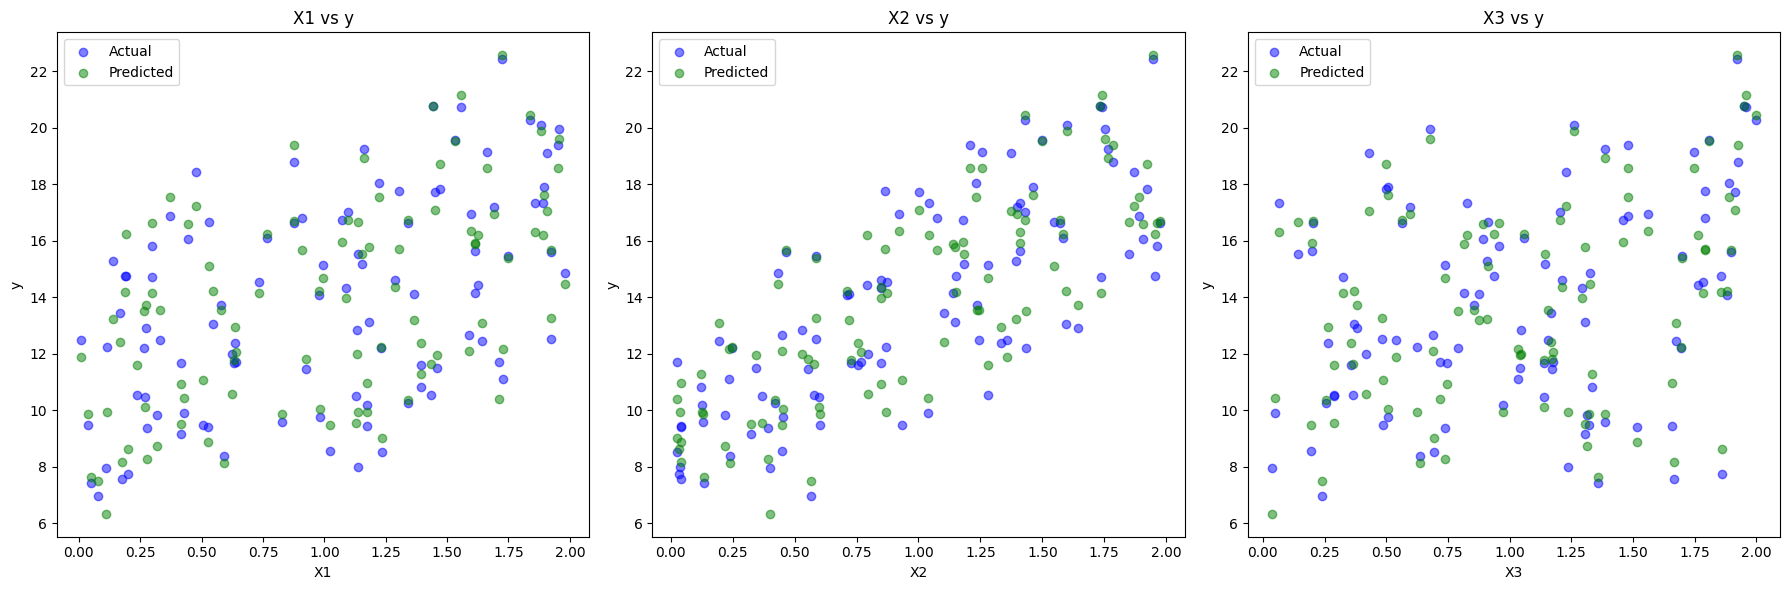

In [9]:
feature_names = ['X1', 'X2', 'X3']

plt.figure(figsize=(18, 6))

for i in range(X.shape[1]):
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, i], y, color='blue', alpha=0.5, label='Actual')
    plt.scatter(X[:, i], y_pred_sklearn, color='green', alpha=0.5, label='Predicted')
    plt.xlabel(feature_names[i])
    plt.ylabel('y')
    plt.title(f'{feature_names[i]} vs y')
    plt.legend()

plt.tight_layout()
plt.show()

Time: [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181

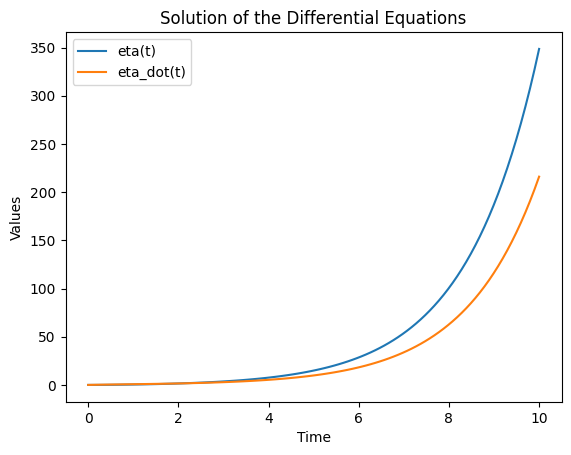

In [13]:
import numpy as np
from scipy.integrate import solve_ivp

# 定义方程的参数
delta = 0.5  # 这是一个假设值，你需要根据实际情况进行调整
W_n = 1.0    # 这是一个假设值，你需要根据实际情况进行调整
F_s = 1.0    # 这是一个假设值，你需要根据实际情况进行调整
W = 1.0      # 这是一个假设值，你需要根据实际情况进行调整

# 定义方程组
def equations(t, y):
    eta, eta_dot = y
    eta_ddot = -2 * delta * W_n * eta_dot + W_n**2 * eta + F_s * W
    return [eta_dot, eta_ddot]

# 初始条件
y0 = [0, 0]  # 这是一个假设值，你需要根据实际情况进行调整

# 定义时间区间
t_span = (0, 10)  # 这是一个假设值，你需要根据实际情况进行调整
t_eval = np.linspace(*t_span, 100)

# 求解方程
solution = solve_ivp(equations, t_span, y0, t_eval=t_eval)

# 打印结果
t = solution.t
eta = solution.y[0]
eta_dot = solution.y[1]

print("Time:", t)
print("Eta:", eta)
print("Eta_dot:", eta_dot)

# 如果需要作图
import matplotlib.pyplot as plt

plt.plot(t, eta, label='eta(t)')
plt.plot(t, eta_dot, label='eta_dot(t)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Solution of the Differential Equations')
plt.show()

In [25]:
train = np.load('/Users/drew/Documents/MathModeling/MathModeling/wave_fitting/data/data_train_25.npz')
test = np.load('/Users/drew/Documents/MathModeling/MathModeling/wave_fitting/data/data_test_7.npz')
train_X, train_t, train_Y = train['X'], train['t'], train['Y']
test_X, test_t, test_Y = test['X'], test['t'], test['Y']
train_X.shape, train_t.shape, train_Y.shape, test_X.shape, test_t.shape, test_Y.shape

((25, 100001), (100001,), (25, 100001), (7, 100001), (100001,), (7, 100001))

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares

In [31]:
def model(t, y, delta, W_n, F_s, W):
    eta, eta_dot = y
    eta_ddot = -2 * delta * W_n * eta_dot + W_n**2 * eta + F_s * W
    return [eta_dot, eta_ddot]

def residuals(params, t, train_X, train_Y):
    delta, W_n, F_s, W = params
    residuals = []
    for i in range(train_X.shape[0]):
        y0 = [train_X[i, 0], 0]  # 初始条件
        solution = solve_ivp(model, (t[0], t[-1]), y0, t_eval=t, args=(delta, W_n, F_s, W))
        residuals.append(solution.y[0] - train_Y[i])
    return np.concatenate(residuals)

# 初始参数猜测
initial_params = [0.5, 1.0, 1.0, 1.0]
# 使用least_squares进行优化
result = least_squares(residuals, initial_params, args=(train_t, train_X, train_Y))
# 输出优化结果
optimal_params = result.x
print("Optimal Parameters:", optimal_params)

KeyboardInterrupt: 